In [1]:
import sys
sys.path.append('/home/loringm/proliferation-and-track')

In [2]:
from tracking import find_match, map_matches

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import zarr

from scipy import ndimage


In [4]:
zarr_dir = '/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'
data = zarr.open(zarr_dir)

imgs = data['GT'][:, 30, 144:400, 144:400]

bnr_images = [np.array(img > 0, dtype=np.int8) for img in imgs]
labeled_images = [ndimage.label(bnrimage)[0] for bnrimage in bnr_images]

remapped_images = []
for i in range(len(labeled_images)):
    if i != 0:
        if labeled_images[i-1].max() != 0:
            match_dic, l1_shape = find_match(labeled_images[i], labeled_images[i-1])

            predicted_image = map_matches(labeled_images[i], match_dic, l1_shape)

            remapped_images.append(predicted_image)
        else:
            remapped_images.append(labeled_images[i])

'unique vals: [0 1]'

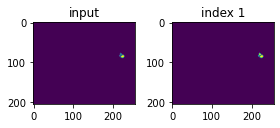

In [5]:
n = 1
if labeled_images[n-1].max() >= 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], False)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image,)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

display(f'unique vals: {np.unique(predicted_image)}')

'unique vals: [0 2]'

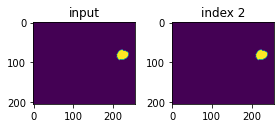

In [6]:
n = 2
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], False)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image,)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

display(f'unique vals: {np.unique(predicted_image)}')

'unique vals: [0 1]'

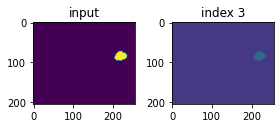

In [7]:
n = 3
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], False)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

display(f'unique vals: {np.unique(predicted_image)}')

'unique vals: [0 1 2]'

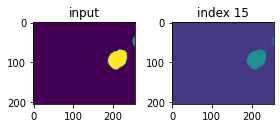

In [8]:
n = 15
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], False)
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

display(f'unique vals: {np.unique(predicted_image)}')

In [9]:
from abc import ABC
import uuid

In [10]:
def make_cell_id():
    return uuid.uuid4()

In [254]:
class Cell(object):  
    def __init__(self, idx):
        self._idx = idx
        self.positions = []
        self.past_ids = []
    @property
    def idx(self):
        return self._idx

    @property
    def _cum_error(self):
        pass
    
    @property
    def curr_id(self):
        return self._curr_id
    
    @curr_id.setter
    def curr_id(self, value):
        self._curr_id = value
        self.past_ids.append(value)
        
    @property
    def position(self):
        return self._position
    
    @position.setter
    def position(self, value):
        self._position = value
        self.positions.append(value)
    
    @property
    def cell_positions(self):
        return self.positions

In [242]:
class Cells(object):
    def __init__(self):
        self.cells = {}
    
    def add_cell(self, cell):
        assert(isinstance(cell,Cell))
        self.cells[cell._idx] = cell
    
    def modify_cell_id(self, cell, idx):
        self.cells[cell].curr_id = idx
    
    def get_cell(self, cell_id):
        return self.cells[cell_id]
    
    def get_cells(self):
        return self.cells
    def get_cell_ids(self):
        return [self.cells]
    def cellcount(self):
        return len(self.cells)

In [13]:
cellContainer = Cells()

In [14]:
for i in range(3):
    idx = make_cell_id()
    new_cell = Cell(idx)
    cellContainer.add_cell(new_cell)

In [15]:
new_cell.position = (5,5)

In [16]:
new_cell.position

(5, 5)

In [17]:
cellContainer.return_cells()

{UUID('93c04c92-52d9-4c41-acdd-39909d84790f'): <__main__.Cell at 0x7f42d8366e50>,
 UUID('c3566e40-534a-419c-a51e-c16555d2c6b1'): <__main__.Cell at 0x7f42d8366f50>,
 UUID('331087d8-be41-419e-b857-0528ebc06ca4'): <__main__.Cell at 0x7f42d8366fd0>}

In [18]:
cell3 = list(cellContainer.return_cells())[2]
cellContainer.retrieve_cell(cell3)

took alternate route


'unique vals: [0 1 2]'

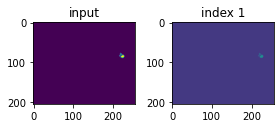

In [19]:
n = 1
if labeled_images[n-1].max() != 0:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], )
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)
else:
    print('took alternate route')
    predicted_image = labeled_images[n]

fig, ax = plt.subplots(1,2, figsize=(4,4))
ax[0].imshow(labeled_images[n])
ax[0].set_title('input')

ax[1].imshow(predicted_image, vmin=-1,vmax=5)
ax[1].set_title('output')
plt.title(f'index {n}')

plt.tight_layout()

display(f'unique vals: {np.unique(predicted_image)}')

In [42]:
from working.schoolyard import Tracker
import networkx as nx

In [57]:
n = 50
network, matches = Tracker(labeled_images[n], labeled_images[n-1]).create_network()

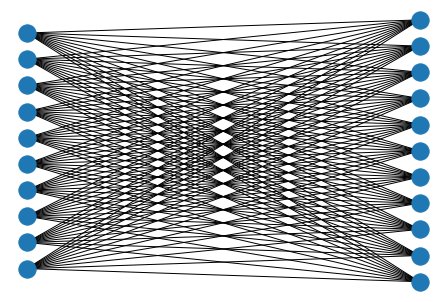

In [58]:
pos = nx.multipartite_layout(network, subset_key="layer")
nx.draw(network, pos)

In [61]:
network.edges

EdgeView([(0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (6, 20), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (8, 20), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (9, 20)])

In [36]:
list(matches.items())

[(0, 2), (1, 4), (2, 0), (4, 1)]

In [62]:
network.edges[list(matches.items())[0]]

{'weight': 5693427862.559632}

In [63]:
network.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [72]:
u = np.unique(labeled_images[n])
first_layer_depth = 10
for k in u:
    if k not in matches:
        maxval = max(matches)
        if maxval <= first_layer_depth:
            maxval += 1
        matches[k] = maxval
# more fuckery to keep the background from swapping
for key in matches.copy().keys():
    if matches[key] <= first_layer_depth:
        del matches[key]
matches[0] = first_layer_depth

In [73]:
for e in sorted(matches.items()):
    if e[0] != 0:
        print(network.edges[e])

{'weight': 93.37958615113428}
{'weight': 1.888888888888892}
{'weight': 0.25}
{'weight': 2194.4032637856644}
{'weight': 6305.267790392485}
{'weight': 6.237189257086422}
{'weight': 4.829605010878929}
{'weight': 13620.774942311335}
{'weight': 8.426403582607236}


In [74]:
labeled_images[n]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [78]:
newcell1 = Cell(make_cell_id())
newcell2 = Cell(make_cell_id())

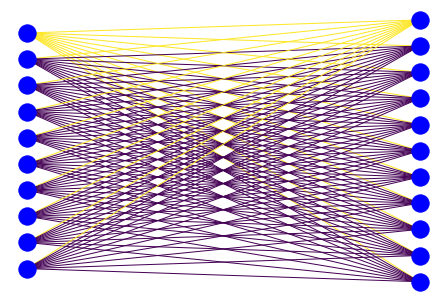

In [164]:
edges,weights = zip(*nx.get_edge_attributes(network,'weight').items())
nx.draw(network, pos, node_color='b', edgelist=edges, edge_color=weights, )

In [163]:
matches

{1: 11, 2: 12, 3: 13, 4: 14, 5: 19, 6: 15, 7: 17, 8: 20, 9: 18, 0: 10}

In [417]:
cells = Cells()
n = 1

runningCells = {}

if n == 1 :
    ## FOR THE FIRST IMAGE WITH CELLS, WE INITIATE THEM
    unq_nrn = np.unique(labeled_images[n])[1:]
    for ucell in unq_nrn:
        print(ucell)
        cellpos = np.mean(np.where(labeled_images[n] == ucell), axis=1)
        newcell = Cell(make_cell_id())
        print(newcell.idx)
        
        newcell.curr_id  = ucell
        newcell.position = cellpos
        cells.add_cell(newcell)
        runningCells[ucell] = newcell.idx

n += 1
unq_nrn2 = np.unique(labeled_images[n])[1:]
if len(unq_nrn2) > len(unq_nrn):
    for i in range(unq_nrn2-unq_nrn):
        cellpos = np.mean(np.where(labeled_images[n] == ucell), axis=1)
        newcell = Cell(make_cell_id())
        print('iter2 ', newcell.idx)
        newcell.curr_id  = ucell
        newcell.position = cellpos
        cells.add_cell(newcell)
        runningCells[ucell] = newcell.idx
        
network, matches = Tracker(labeled_images[n-1], labeled_images[n]).create_network()

u,inv = np.unique(labeled_images[n], return_inverse = True)

first_layer_depth = 3

# more fuckery to keep the background from swapping
for key in matches.copy().keys():
    if matches[key] <= first_layer_depth:
        del matches[key]
matches[0] = first_layer_depth

newmatchpairings = [(a, b-first_layer_depth) for a,b in matches.items() if a != 0]
for pear in newmatchpairings:
    ## CELL ID OF PREVIOUS LAYER
    cellid = runningCells[pear[0]]
    
    currcell = cells.get_cell(cellid)
    print('curcell', currcell.idx)
    # UPDATE POSITION, WEIGHTS INFO, NEW RUNNING ID
    currcell._position = np.mean(np.where(labeled_images[n] == pear[1]), axis=1)
    currcell._cost = network.edges[(pear[0], pear[1]+first_layer_depth)]
    currcell._curr_id = pear[1]

1
6c1a5361-98bc-45de-ba9c-1750e5feb4a3
2
2e1ffd50-d213-4e2b-ac9a-b826e61c4caa
curcell 2e1ffd50-d213-4e2b-ac9a-b826e61c4caa


In [418]:
runningCells

{1: UUID('6c1a5361-98bc-45de-ba9c-1750e5feb4a3'),
 2: UUID('2e1ffd50-d213-4e2b-ac9a-b826e61c4caa')}

In [422]:
cells.get_cell(runningCells[2]).curr_id

1

In [423]:
cells.get_cell(runningCells[2]).past_ids

[2]

In [425]:
cells.get_cell(runningCells[2])._cost

{'weight': 15.084070999881568}

In [421]:
newmatchpairings

[(2, 1)]

In [ ]:
pos = nx.multipartite_layout(network, subset_key="layer")
nx.draw(network, pos)

In [380]:
matches.items()

dict_items([(2, 4), (0, 3)])

In [381]:
network.edges[(1,4)]

{'weight': 21.754766314745194}

In [382]:
matches.items()
for a,b in matches.items():
    print(a,b)
## CURRENT LAYER, NEXT LAYER
display([(a, b-first_layer_depth) for a,b in matches.items() if a != 0 and b != first_layer_depth])

2 4
0 3


[(2, 1)]

In [392]:
newmatchpairings = [(a, b-first_layer_depth) for a,b in matches.items() if a != 0]
for pear in newmatchpairings:
    ## CELL ID OF PREVIOUS LAYER
    cellid = runningCells[pear[0]]
    
    currcell = cells.get_cell(cellid)
    
    # UPDATE POSITION, WEIGHTS INFO, NEW RUNNING ID
    currcell._position = np.mean(np.where(labeled_images[n] == pear[1]), axis=1)
    currcell._cost = network.edges[(pear[0], pear[1]+first_layer_depth)]
    currcell._curr_id = pear[0]

In [327]:
network.edges[(1,2)]

{'weight': 97065132.67686962}

In [256]:
runningCells

{1: UUID('aefd80b1-acbd-4ec1-8144-fe7960b06859'),
 2: UUID('45595fb8-85fc-41c8-be40-0e5adefba039')}

In [257]:
network, matches = Tracker(labeled_images[n+1], labeled_images[n]).create_network()
matches

{0: 2, 1: 4, 2: 0, 4: 1}

In [290]:
matches

{0: 10}

In [258]:
cells

In [259]:
runningCells[list(runningCells)[1]]

UUID('45595fb8-85fc-41c8-be40-0e5adefba039')

In [283]:
cells.modify_cell_id(runningCells[list(runningCells)[0]], 1)

In [287]:
cells.get_cell(runningCells[list(runningCells)[0]]).past_ids

[1, 1, 1, 1, 1, 1, 1, 1, 1]

In [272]:
cells.get_cell(runningCells[list(runningCells)[1]]).past_ids

[2, 1]

In [262]:
for e in sorted(matches.items()):
    if e[0] != 0 and e[1] != 0:
        print(network.edges[e])

{'weight': 15.084070999881568}
{'weight': 15.084070999881568}


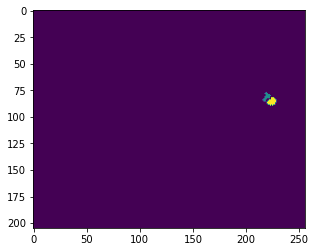

In [263]:
plt.imshow(labeled_images[n])

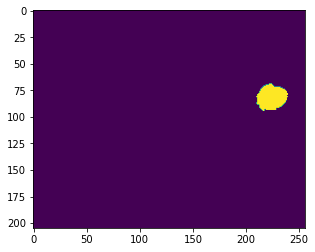

In [228]:
plt.imshow(labeled_images[n+1])

In [210]:
np.unique(labeled_images[n])[1:], np.unique(labeled_images[n+1])[1:]

(array([1, 2], dtype=int32), array([1], dtype=int32))

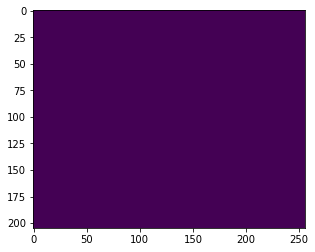

In [211]:
plt.imshow(labeled_images[n-1])

In [150]:
np.unique(labeled_images[n-1])[1:], np.unique(labeled_images[n])[1:], np.unique(labeled_images[n+1])[1:]

(array([], dtype=int32), array([1, 2], dtype=int32), array([1], dtype=int32))

In [151]:
newcell.idx

UUID('6c601218-ca4b-442e-8f76-a159c933fee0')

In [142]:
newcell.cell_positions

[array([ 85.625     , 224.33333333])]

In [143]:
cells.return_cells()

{UUID('86fbcf3d-2697-4d63-9119-c71d666d65f9'): <__main__.Cell at 0x7f42d7912d10>,
 UUID('6c601218-ca4b-442e-8f76-a159c933fee0'): <__main__.Cell at 0x7f42d601fd90>}

In [112]:
cells.cellcount()

2

In [146]:
find_match(labeled_images[n], labeled_images[n-1])

({0: 3, 3: 0}, 3)

In [147]:
find_match(labeled_images[n+1], labeled_images[n])

({0: 2, 1: 4, 2: 0, 4: 1}, 2)

In [ ]:
    match_dic, l1_shape = find_match(labeled_images[n], labeled_images[n-1], )
    predicted_image = map_matches(labeled_images[n], match_dic, l1_shape)

In [100]:
display(newcell.pos, newcell.curr_id, newcell._idx())

array([ 85.625     , 224.33333333])

2

UUID('9cda1bda-df17-4cc4-94b8-4455e84f5dac')

In [90]:
np.mean(np.array(labeled_images[1] == 1, dtype=np.int8))

0.0005907012195121951

array([34.69288703, 94.958159  ])

In [84]:
newcell2.idx

UUID('10246a5b-fe94-4ed8-a058-d27e1c9264e5')

In [85]:
newcell1.idx

UUID('940ca35c-3833-48c0-ae4d-c49120796e7c')

In [27]:
matches

{0: 2, 1: 4, 2: 0, 4: 1}

In [22]:
new_cell.cell_positions

[(5, 5)]